In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Create dataset
np.random.seed(42)
X = (np.random.rand(100,1)-0.5) * 10
y = -0.2 * X**3 + np.random.normal(loc=0, scale=2, size=(100, 1))

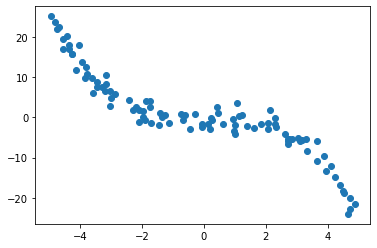

In [158]:
# plot data
plt.scatter(X, y)

In [159]:
XX = np.column_stack([X, np.ones(shape=[len(X), 1])])

# Least squares

def least_squares(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [160]:
WW = least_squares(XX, y)
WW

array([[-3.10224715],
       [ 0.06642012]])

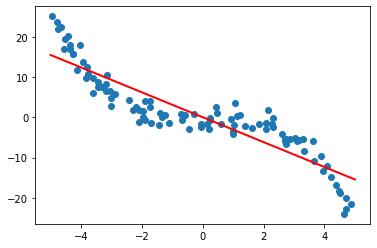

In [161]:
# Plot
xs = np.linspace(-5, 5)
ys = WW[0] * xs + WW[1]

plt.scatter(X, y)
plt.plot(xs, ys, c='r', lw=2)

In [162]:
# Solving non-linear problem using kernel trick

poly_features = PolynomialFeatures(degree=3, include_bias=True)
polyX = poly_features.fit_transform(X)


In [163]:
polyWW = least_squares(polyX, y)

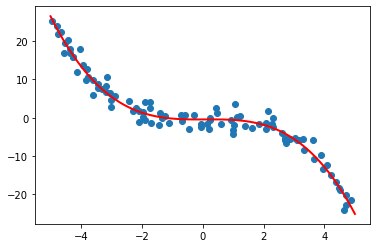

In [164]:
# Plot
xs = np.linspace(-5, 5, 100).reshape(-1, 1)
polyxs = poly_features.transform(xs)
polyys = polyxs @ polyWW


plt.scatter(X, y)
plt.plot(xs, polyys, c='r', lw=2)

In [165]:
import time

# Slow kernel trick
X = np.random.rand(100, 13)
results_degrees = list()
results_time = list()

for i in range(13):
    poly = PolynomialFeatures(degree=i+1)
    
    start = time.time()
    polyX = poly.fit_transform(X)
    end = time.time()

    results_degrees.append(i+1)
    results_time.append(end-start)

    print(f"{i+1}\t Num features {polyX.shape[1]} Time {end-start}")


1	 Num features 14 Time 0.0010027885437011719
2	 Num features 105 Time 0.0010020732879638672
3	 Num features 560 Time 0.001001119613647461
4	 Num features 2380 Time 0.0030012130737304688
5	 Num features 8568 Time 0.005004167556762695
6	 Num features 27132 Time 0.013010025024414062
7	 Num features 77520 Time 0.0270233154296875
8	 Num features 203490 Time 0.059050559997558594
9	 Num features 497420 Time 0.10208988189697266
10	 Num features 1144066 Time 0.2162015438079834
11	 Num features 2496144 Time 0.4894280433654785
12	 Num features 5200300 Time 1.031907558441162
13	 Num features 10400600 Time 2.048799753189087


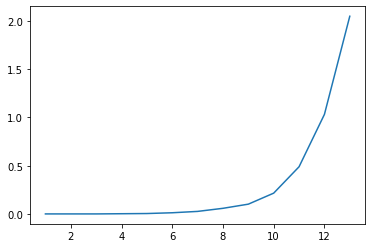

In [166]:
plt.plot(results_degrees, results_time)

# SVM

In [167]:
from sklearn.svm import SVC
import scipy

X = np.array([[ 0.46613554,  0.92048757],
       [-0.92129195,  0.06723639],
       [-0.15836636,  0.00430243],
       [-0.24055905, -0.87032292],
       [ 0.06245105, -0.53698416],
       [-0.2265037 , -0.43835751],
       [-0.00480479, -0.17372081],
       [-0.1525277 , -0.34399658],
       [-0.27360329,  0.35339202],
       [-0.77464508, -0.48715511],
       [-0.58724291,  0.74419972],
       [-0.97596949, -0.72172963],
       [ 0.42376225, -0.72655597],
       [ 0.96383922, -0.23371331],
       [ 0.16264643, -0.46949742],
       [-0.74294705, -0.42576417],
       [ 0.05089437, -0.20522071],
       [-0.19442744,  0.09617478],
       [-0.97102743,  0.79663992],
       [ 0.0596995 , -0.70129219],
       [-0.83934851, -0.95616033],
       [-0.38249705,  0.4973605 ],
       [ 0.3474666 ,  0.70664397],
       [ 0.35871444,  0.88679345],
       [-0.05914582,  0.23124686],
       [-0.52156643,  0.32986941],
       [-0.53579646,  0.67530208],
       [ 0.13683914, -0.96158184],
       [ 0.65904541, -0.12015303],
       [-0.69078363,  0.5615536 ],
       [ 0.47738323, -0.70919275],
       [ 0.93069669,  0.44019132],
       [ 0.19750088, -0.68869404],
       [-0.75048675, -0.18170522],
       [-0.45288395, -0.25894991],
       [-0.74644547,  0.87781953],
       [ 0.14620452,  0.56864508],
       [ 0.25719272, -0.58405476],
       [ 0.87149524,  0.01384224],
       [-0.71473576,  0.31568314],
       [-0.252637  , -0.67418371],
       [ 0.24718308,  0.95191416],
       [-0.38149953, -0.64066291],
       [-0.23112698,  0.04678807],
       [ 0.72631766,  0.7390158 ],
       [-0.91748062, -0.15131021],
       [ 0.74957917,  0.66966866],
       [ 0.76771849,  0.06662777],
       [-0.04233756, -0.91320835],
       [ 0.63840333,  0.06277738],
       [-0.78887281, -0.90311183],
       [-0.73099834, -0.69587363],
       [-0.50947652, -0.99144951],
       [ 0.14294609,  0.5474932 ],
       [ 0.4367906 ,  0.31953258],
       [-0.13970851,  0.81817884],
       [ 0.6440873 ,  0.79118775],
       [ 0.41714043, -0.66672029],
       [ 0.59283022, -0.71836746],
       [ 0.55379696,  0.98846202],
       [-0.91819517,  0.34203895],
       [ 0.02020188,  0.83696694],
       [ 0.6182918 ,  0.04254014],
       [-0.09354765, -0.30050483],
       [-0.08489545,  0.06431463],
       [-0.11886358, -0.68738895],
       [ 0.44428375,  0.18273761],
       [ 0.26486362, -0.98398013],
       [ 0.13222452,  0.91495035],
       [-0.11101656,  0.00541343],
       [-0.07696178, -0.92720555],
       [ 0.22602214,  0.56040092],
       [ 0.74227542,  0.32930104],
       [ 0.43524657,  0.35332933],
       [-0.89277607, -0.59996171],
       [-0.94836212,  0.78777302],
       [ 0.1783319 , -0.2142071 ],
       [-0.07832238, -0.25046584],
       [ 0.17611799, -0.96927832],
       [-0.95938454, -0.26504646],
       [ 0.58666766, -0.94620881],
       [-0.77336565,  0.46735057],
       [-0.94414054,  0.39044333],
       [ 0.61524645,  0.15907662],
       [-0.09855302,  0.9816656 ],
       [ 0.53937097,  0.34487634]])

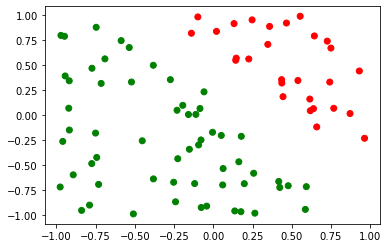

In [168]:
y = ["red" if x + y > 0.3 else "green" for [x,y] in X]
plt.scatter(X[:,0], X[:,1], c=y)

In [169]:
X = np.column_stack([X, np.ones([len(X),1])])

def objfun(x, *args):
    return 0.5 * x.dot(x)

newy = np.array([1 if z=="red" else -1 for z in y])
eyey = np.eye(len(newy))*newy

A = eyey @ X 
ub = +np.inf
lb = 1


lc = scipy.optimize.LinearConstraint(A, lb, ub)

x0 = np.zeros([X.shape[1], 1])
W = scipy.optimize.minimize(objfun, x0, constraints=[lc])

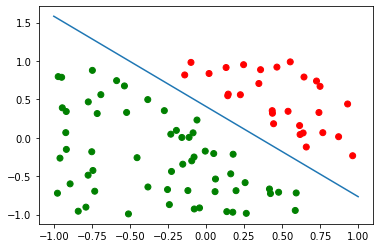

In [172]:
# Plot
xs = np.linspace(-1, 1)
m = - W.x[0] / W.x[1]
t = - W.x[2] / W.x[1]

ys = xs * m + t

plt.plot(xs, ys)
plt.scatter(X[:,0], X[:,1], c=y)